# Part 4: Exploratory Data Analysis

---



1. EDA
2. Meanwhile, feature engineering entails employing various techniques to manipulate the data. This may include adding or removing relevant features, handling missing data, encoding variables, and dealing with categorical variables, among other tasks

### Workflow
1. Reading updated dataset
2. Performing data exploration to study and extract valuable information and non-obvious insights, which will help in model building
3. EDA Steps include general insights regarding the data, analyzing missing values, numerical and categorical features’ distribution, outliers, multicollinearity
4. EDA Univariate Analysis

In [235]:
#imports
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from scipy import stats
from sklearn import preprocessing

from category_encoders import BinaryEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import pickle

#to ignore warnings due to deprecated packages 
import warnings
warnings.filterwarnings('ignore')

#### Reading updated dataset

In [22]:
pathDataset = 'C:/Users/Isaac.Mwendwa/Documents/Productive_Employment_Prediction/Model Building/Datasets/Wage_Employment_and_GDP_2011_to_2018_Updated.csv'

date_cols = ['Year']
df = pd.read_csv(pathDataset, header = 0, parse_dates=date_cols)

df.drop('Unnamed: 0', axis=1, inplace=True)

### Step 1 in EDA: General Insights About Data
* Will include finding:
    * Number of rows and columns (shape of dataset)
    * Viewing observations (head, tail)
    * Values in the data and datatypes
    * Checking duplicated values
    * Viewing Missing values in the dataset
    * Checking summary statistics
    * Checking number of numerical Features
    * Checking Number and Cardinality of Categorical Features

In [23]:
# Checking Number of rows and columns

df.shape

(168, 13)

* The dataset has 168 observations (rows) and 13 features/variables (columns)

In [24]:
# Checking head to display top 5 observations

df.head()

,Year,Industry,Contribution_to_GDP,Growth_of_GDP,Wage_bracket_0_to_9999,Wage_bracket_10000_to_14999,Wage_bracket_15000_to_19999,Wage_bracket_20000_to_24999,Wage_bracket_25000_to_29999,Wage_bracket_30000_to_49999,Wage_bracket_50000_to_99999,Wage_bracket_100000_plus,Total_number_in_wage_employment
0,2011-01-01,"Agriculture, Forestry And Fishing",23.8,1.5,12141,36238,111549,100240,37712,23976,12935,6631,341422
1,2011-01-01,Mining And Quarrying,0.7,7.1,59,101,944,1586,1965,2312,1752,13,8732
2,2011-01-01,Manufacturing,9.6,3.4,632,1723,17205,50949,54427,76329,70040,5580,276885
3,2011-01-01,"Electricity, Gas, Steam And Air Conditioning S...",0.4,-4.4,1680,101,45,3229,690,1413,6830,30,14018
4,2011-01-01,"Water Supply; Sewerage, Waste Management And R...",0.7,3.0,1680,2498,9143,3036,1983,1970,818,83,21211


In [25]:
# Checking tail to display last 5 observations

df.tail()

,Year,Industry,Contribution_to_GDP,Growth_of_GDP,Wage_bracket_0_to_9999,Wage_bracket_10000_to_14999,Wage_bracket_15000_to_19999,Wage_bracket_20000_to_24999,Wage_bracket_25000_to_29999,Wage_bracket_30000_to_49999,Wage_bracket_50000_to_99999,Wage_bracket_100000_plus,Total_number_in_wage_employment
163,2018-01-01,Human Health And Social Work Activities,1.5,4.5,1680,960,6108,17810,36788,65229,17572,4287,150434
164,2018-01-01,"Arts, Entertainment And Recreation",0.1,6.4,1680,46,857,1446,2277,1188,878,550,8922
165,2018-01-01,Other Service Activities,0.6,6.7,1680,552,1735,4490,11270,11251,6312,722,38012
166,2018-01-01,Activities Of Households As Employers; Undiffe...,0.4,1.6,1680,316,911,17245,15082,53200,29083,4186,121703
167,2018-01-01,Activities Of Extraterritorial Organizations A...,-1.9,1.1,1680,2498,9143,17074,20948,34258,28868,4186,118655


In [26]:
# checking information about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Year                             168 non-null    datetime64[ns]
 1   Industry                         168 non-null    object        
 2   Contribution_to_GDP              168 non-null    float64       
 3   Growth_of_GDP                    168 non-null    float64       
 4   Wage_bracket_0_to_9999           168 non-null    int64         
 5   Wage_bracket_10000_to_14999      168 non-null    int64         
 6   Wage_bracket_15000_to_19999      168 non-null    int64         
 7   Wage_bracket_20000_to_24999      168 non-null    int64         
 8   Wage_bracket_25000_to_29999      168 non-null    int64         
 9   Wage_bracket_30000_to_49999      168 non-null    int64         
 10  Wage_bracket_50000_to_99999      168 non-null    int64        

* The table shows that we have 168 number of records in each column (rows)
* The dataset contains 168 non-null observations in each column 
* The table also displays the columns' Data type as follows: 
    * We have 1 categorical variable of datatype object: Industry
    * We have 1 datetime column: Year
    * The numerical variables of datatype float64 include: Contribution_to_GDP and Growth_of_GDP
    * The numerical variables of datatype int64 include: Total_number_in_wage_employment, Wage_bracket_10000_to_14999, Wage_bracket_15000_to_19999, Wage_bracket_20000_to_24999, Wage_bracket_25000_to_29999, Wage_bracket_30000_to_49999, Wage_bracket_50000_to_99999, Wage_bracket_100000_plus, Total_number_in_wage_employment
* The memory usage of the dataset is 17.2 KB

In [27]:
# Checking for Duplication

df.nunique()

Year                                 8
Industry                            21
Contribution_to_GDP                 78
Growth_of_GDP                       95
Wage_bracket_0_to_9999              82
Wage_bracket_10000_to_14999        123
Wage_bracket_15000_to_19999        133
Wage_bracket_20000_to_24999        146
Wage_bracket_25000_to_29999        147
Wage_bracket_30000_to_49999        146
Wage_bracket_50000_to_99999        147
Wage_bracket_100000_plus           134
Total_number_in_wage_employment    147
dtype: int64

* The data shows that we have 8 unique Year values, and 21 unique Industry values

In [28]:
# Checking number of missing values in each column

df.isnull().sum()

Year                               0
Industry                           0
Contribution_to_GDP                0
Growth_of_GDP                      0
Wage_bracket_0_to_9999             0
Wage_bracket_10000_to_14999        0
Wage_bracket_15000_to_19999        0
Wage_bracket_20000_to_24999        0
Wage_bracket_25000_to_29999        0
Wage_bracket_30000_to_49999        0
Wage_bracket_50000_to_99999        0
Wage_bracket_100000_plus           0
Total_number_in_wage_employment    0
dtype: int64

In [29]:
# Checking percentage of missing values in each column

(df.isnull().sum()/(len(df)))*100

Year                               0.0
Industry                           0.0
Contribution_to_GDP                0.0
Growth_of_GDP                      0.0
Wage_bracket_0_to_9999             0.0
Wage_bracket_10000_to_14999        0.0
Wage_bracket_15000_to_19999        0.0
Wage_bracket_20000_to_24999        0.0
Wage_bracket_25000_to_29999        0.0
Wage_bracket_30000_to_49999        0.0
Wage_bracket_50000_to_99999        0.0
Wage_bracket_100000_plus           0.0
Total_number_in_wage_employment    0.0
dtype: float64

In [30]:
# Checking Summary Statistics

df.describe()

,Contribution_to_GDP,Growth_of_GDP,Wage_bracket_0_to_9999,Wage_bracket_10000_to_14999,Wage_bracket_15000_to_19999,Wage_bracket_20000_to_24999,Wage_bracket_25000_to_29999,Wage_bracket_30000_to_49999,Wage_bracket_50000_to_99999,Wage_bracket_100000_plus,Total_number_in_wage_employment
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,4.403012,5.354037,1680.553571,2498.755952,9143.380952,17074.642857,20948.005952,34258.625000,28868.702381,4186.000000,118658.666667
std,6.463415,4.126909,2308.034773,5485.628377,19421.986836,22994.028045,27002.516428,40714.966114,38148.329144,6741.704946,126191.119148
min,-2.800000,-16.700000,23.000000,35.000000,45.000000,195.000000,71.000000,236.000000,275.000000,13.000000,2328.000000
25%,0.800000,3.000000,406.000000,249.500000,800.000000,3144.750000,2233.000000,2380.750000,2009.750000,540.000000,19352.500000
50%,1.700000,5.354037,1680.000000,889.000000,1773.000000,8038.000000,14603.000000,22798.000000,18818.000000,2585.000000,77797.500000
75%,6.725000,7.025000,1680.000000,2498.000000,9143.000000,21628.750000,29698.000000,50732.000000,36935.250000,5052.750000,165884.000000
max,34.800000,19.000000,13312.000000,36797.000000,113270.000000,101786.000000,140233.000000,265031.000000,282385.000000,56221.000000,576831.000000


* The output shows that most of the features are on different scales (e.g Contribution_to_GDP is a percentage, while the Wage columns are numerical counts)
* Because of this, the ranges of values and the standard deviations for each are very different from one another
* We can see here that Contribution_to_GDP has a standard deviation of about 6.46, while Total_number_in_wage_employment has a standard deviation of about 126191.11
* When working with features with largely differing scales, it is often a good idea to standardize the features so that they all have a mean of 0 and a standard deviation of 1
* A feature without any values close to zero may also make it more difficult to estimate and interpret the intercept of a regression model
* Standardizing or otherwise re-scaling the feature can fix this issue, which will be done in Feature Engineering Step

In [31]:
# Checking Numerical Features

num_cols = df.select_dtypes(include=np.number).columns.tolist()

print("Numerical Variables Count: {}".format(len(num_cols)))
print(num_cols)

Numerical Variables Count: 11
['Contribution_to_GDP', 'Growth_of_GDP', 'Wage_bracket_0_to_9999', 'Wage_bracket_10000_to_14999', 'Wage_bracket_15000_to_19999', 'Wage_bracket_20000_to_24999', 'Wage_bracket_25000_to_29999', 'Wage_bracket_30000_to_49999', 'Wage_bracket_50000_to_99999', 'Wage_bracket_100000_plus', 'Total_number_in_wage_employment']


In [32]:
# Checking Categorical Variables

cat_cols=df.select_dtypes(include=['object']).columns.tolist()

print("Categorical Variables Count: {}".format(len(cat_cols)))
print(cat_cols)

Categorical Variables Count: 1
['Industry']


In [33]:
# Checking Cardinality of Categorical Features

for feature in cat_cols:
    print('The feature is: {} and number of categories are: {}'.format(feature, len(df[feature].unique())))

The feature is: Industry and number of categories are: 21


* We generally convert the categorical values of a feature into dummy variables so that our algorithm understands (called One hot encoding)
* If the cardinality of a particular category is very high, then we do not use one-hot encoding as it might lead to a Curse of Dimensionality (CoD)
* CoD is defined as **"as the number of dimensions or features increases, the amount of data needed to generalize the machine learning model accurately increases exponentially"**
* The increase in dimensions makes the data sparse, and it increases the difficulty of generalizing the model. More training data is needed to generalize that model better
* The threshold value of categories that I have chosen for this case to perform one-hot encoding is 10, which will be effected in the Feature Engineering Phase

### Step 2 of EDA: EDA Univariate Analysis
* Univariate analysis involves analyzing/visualizing the dataset by taking one variable at a time
* 

Contribution_to_GDP
Skew : 2.87


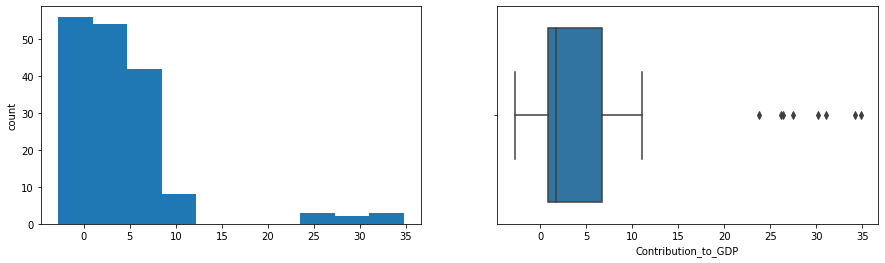

Growth_of_GDP
Skew : -0.47


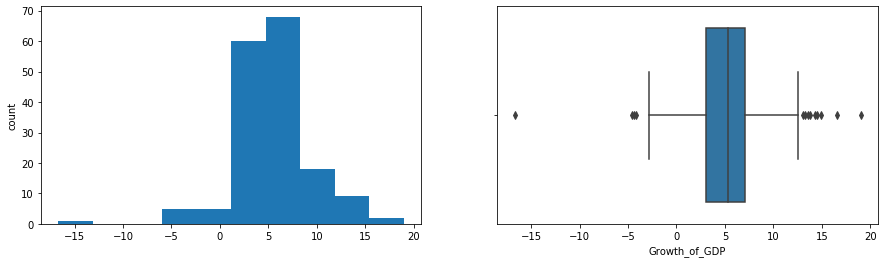

Wage_bracket_0_to_9999
Skew : 3.7


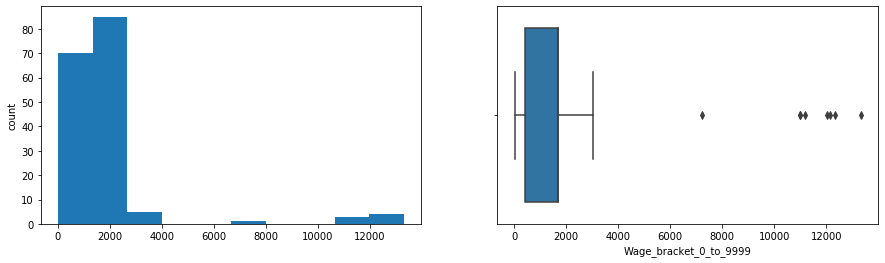

Wage_bracket_10000_to_14999
Skew : 4.81


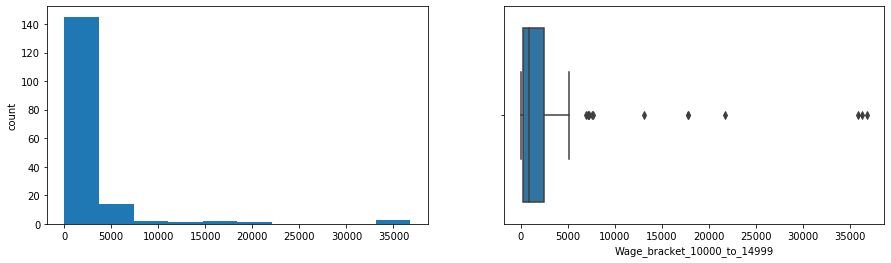

Wage_bracket_15000_to_19999
Skew : 3.86


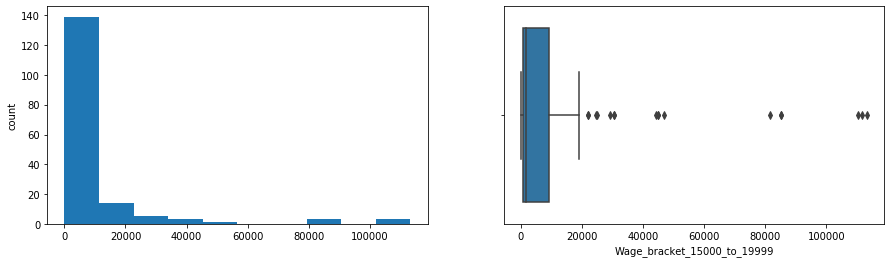

Wage_bracket_20000_to_24999
Skew : 2.13


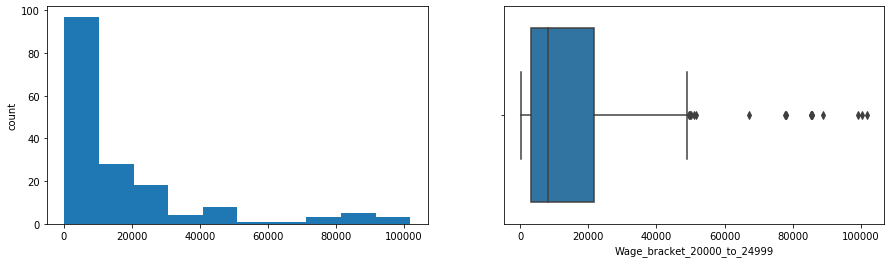

Wage_bracket_25000_to_29999
Skew : 2.55


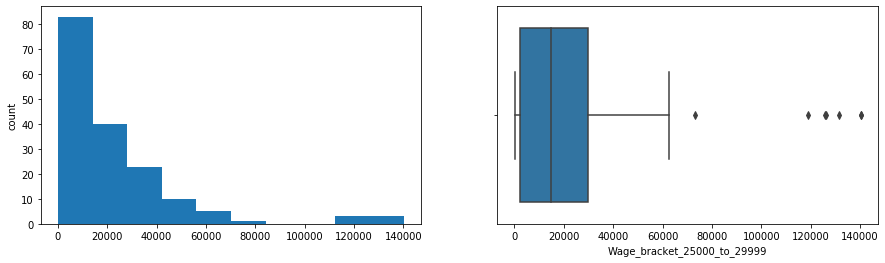

Wage_bracket_30000_to_49999
Skew : 2.12


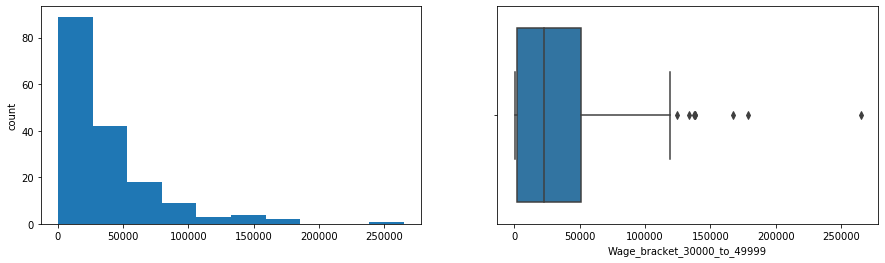

Wage_bracket_50000_to_99999
Skew : 3.12


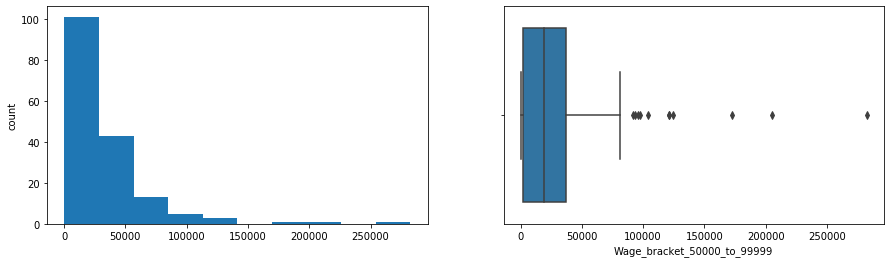

Wage_bracket_100000_plus
Skew : 4.99


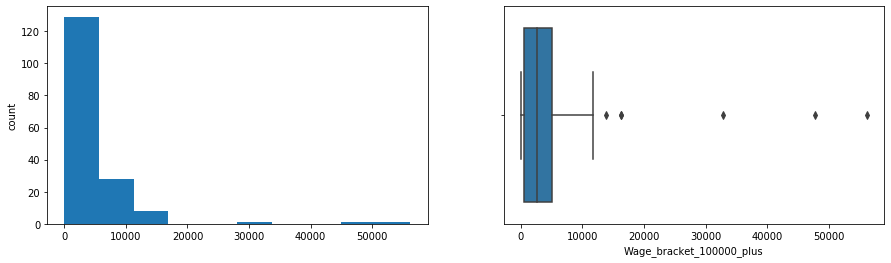

Total_number_in_wage_employment
Skew : 1.49


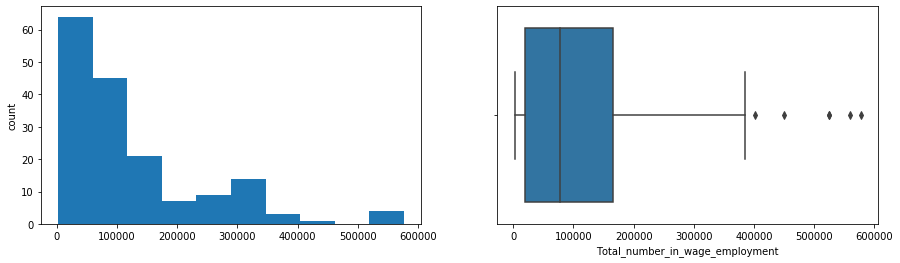

In [34]:
# EDA of Numerical Columns
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

* The plots show the histograms and skewness metrics for the numerical columns
* Majority of the feature columns are highly positively skewed (skewness greater than 1)
* We will handle this in feature engineering

In [35]:
# Function to plot horizontal bar chart

def draw_horizontal_bar(df_column, title):
  data_series = df_column.value_counts().sort_values()
  ax = data_series.plot(kind="barh", figsize=(10, 6), color='#6495ED', zorder=2, width=0.85)
  ax.set_title(title, weight='bold', size=12)
  # Draw vertical axis lines
  vals = ax.get_xticks()
  for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

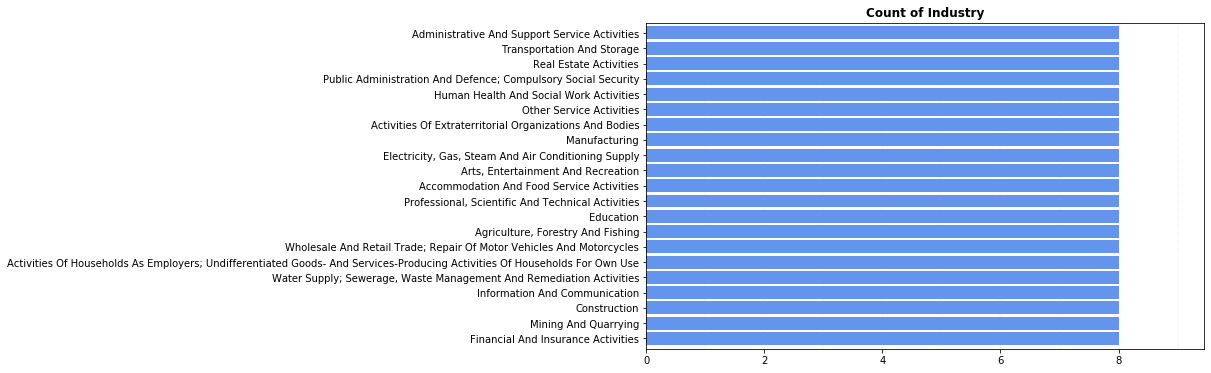

In [36]:
# Count of Industry
df_column = df['Industry']
title = 'Count of Industry'

# calling horizontal bar function
draw_horizontal_bar(df_column, title)

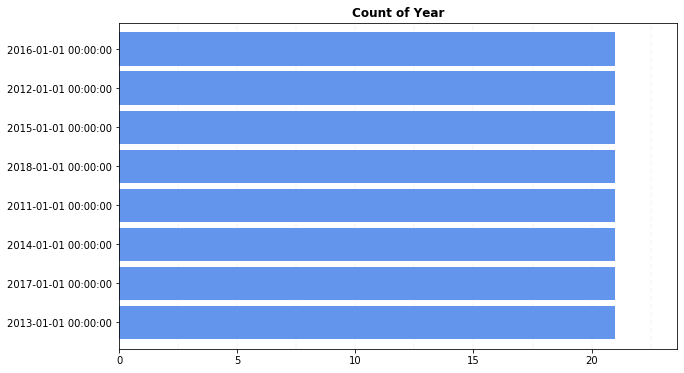

In [37]:
# Count of Year
df_column = df['Year']
title = 'Count of Year'

# calling horizontal bar function
draw_horizontal_bar(df_column, title)

* The above two plots for categorical features show that we have 8 unique observations of a particular industry, and 21 observations in a year (hence 8*21=168 observations)

#### Checking Correlations of Features

In [38]:
# converting Year (datetime) to float 
df['Year'] = df['Year'].values.astype("float64")
df['Year'].dtype

dtype('float64')

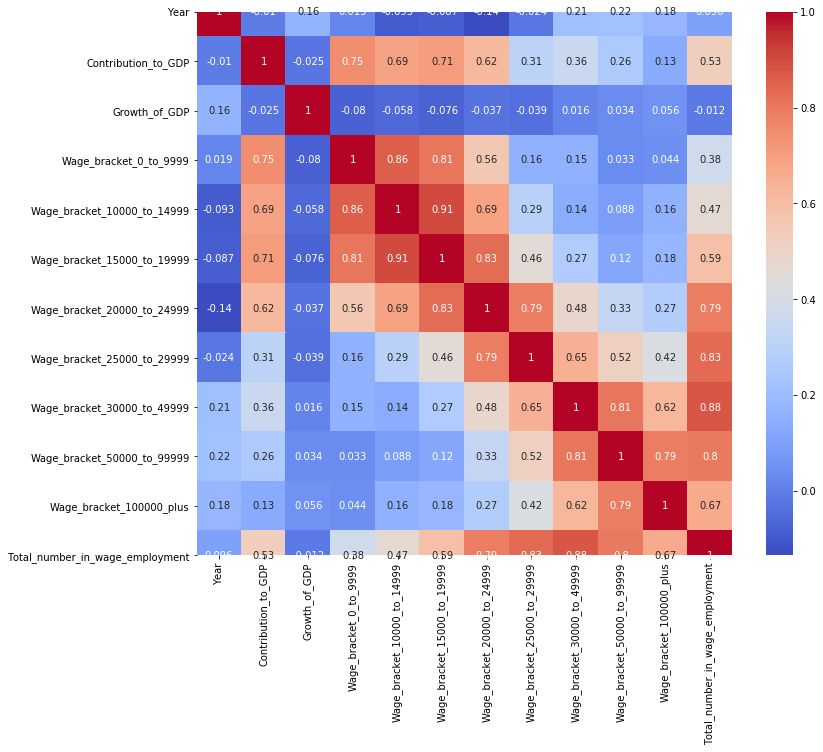

In [39]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()

* The matrix above shows correlations among the features such that darker shades of red imply high positive correlation; and darker shades of blue imply high negative correlations.
* As correlations between the predictor variables is predominantly high (note red shades), this implies that there is significant multicollinearity between our features
* Thus, we will need to do feature engineering in our variables, to ensure there is no multicollinearity between our predictors

## Feature Engineering

* Feature Engineering improves the performance of the model, as model performance is dependent on data preprocessing and data handling

* The processes here will include: 
    * Feature Selection
    * Handling missing values
    * Handling imbalanced data
    * Handling outliers
    * Binning
    * Encoding
    * Feature Scaling


### 1. Feature Selection (FS)
* FS is a selection of required and important independent features, which have more relation with the dependent features, thus building a good model
* Methods in FS include:
    * Correlation Matrix with Heatmap
    * Univariate Selection
    * ExtraTreesClassifier method
* We will use the first method in this project

In [40]:
df.head()

,Year,Industry,Contribution_to_GDP,Growth_of_GDP,Wage_bracket_0_to_9999,Wage_bracket_10000_to_14999,Wage_bracket_15000_to_19999,Wage_bracket_20000_to_24999,Wage_bracket_25000_to_29999,Wage_bracket_30000_to_49999,Wage_bracket_50000_to_99999,Wage_bracket_100000_plus,Total_number_in_wage_employment
0,1.293840e+18,"Agriculture, Forestry And Fishing",23.8,1.5,12141,36238,111549,100240,37712,23976,12935,6631,341422
1,1.293840e+18,Mining And Quarrying,0.7,7.1,59,101,944,1586,1965,2312,1752,13,8732
2,1.293840e+18,Manufacturing,9.6,3.4,632,1723,17205,50949,54427,76329,70040,5580,276885
3,1.293840e+18,"Electricity, Gas, Steam And Air Conditioning S...",0.4,-4.4,1680,101,45,3229,690,1413,6830,30,14018
4,1.293840e+18,"Water Supply; Sewerage, Waste Management And R...",0.7,3.0,1680,2498,9143,3036,1983,1970,818,83,21211


In [41]:
X = df.drop('Total_number_in_wage_employment', 1)  # Feature Matrix
y = df['Total_number_in_wage_employment']          # Target Variable

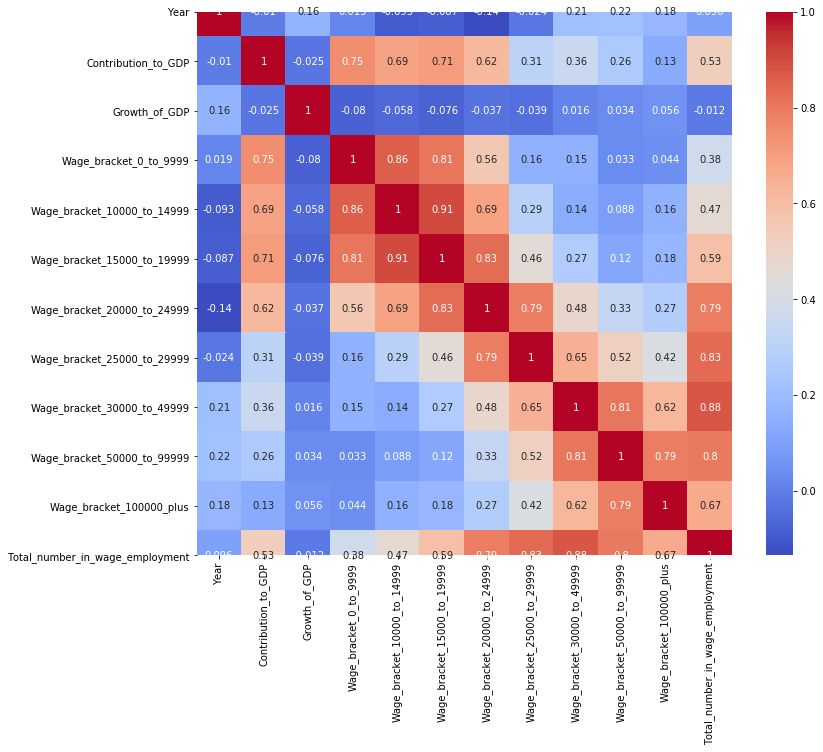

In [42]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()

In [43]:
#Correlation with output variable
cor_target = abs(cor["Total_number_in_wage_employment"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Contribution_to_GDP                0.529690
Wage_bracket_15000_to_19999        0.588454
Wage_bracket_20000_to_24999        0.790571
Wage_bracket_25000_to_29999        0.831915
Wage_bracket_30000_to_49999        0.876645
Wage_bracket_50000_to_99999        0.799403
Wage_bracket_100000_plus           0.666937
Total_number_in_wage_employment    1.000000
Name: Total_number_in_wage_employment, dtype: float64

* As we can see, only the features **'Contribution_to_GDP', 'Wage_bracket_15000_to_19999', 'Wage_bracket_20000_to_24999', 'Wage_bracket_25000_to_29999', 'Wage_bracket_30000_to_49999', 'Wage_bracket_50000_to_99999', and 'Wage_bracket_100000_plus'  are highly correlated with the output variable "Total_number_in_wage_employment"**
* Hence we will drop all other features apart from these
* One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other (no collinearity)
* If these variables are correlated with each other, then we need to keep only one of them and drop the rest
* So let us check the correlation of selected features with each other
* This can be done by visually checking it from the below correlation matrix

#### Checking if Multicollinearity is present

#### 1. Using Correlations Matrix of features

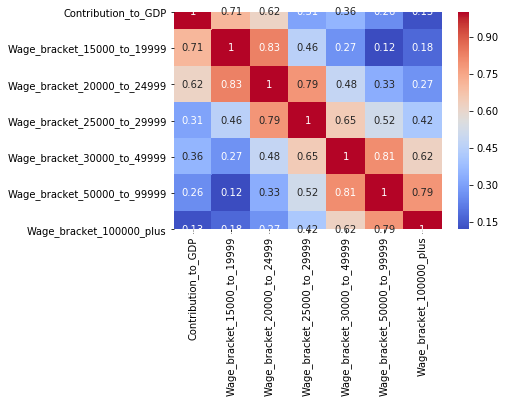

In [44]:
df_predictors = df[['Contribution_to_GDP', 'Wage_bracket_15000_to_19999', 'Wage_bracket_20000_to_24999', 
                    'Wage_bracket_25000_to_29999', 'Wage_bracket_30000_to_49999', 'Wage_bracket_50000_to_99999', 
                    'Wage_bracket_100000_plus']]


#Using Pearson Correlation
# plt.figure(figsize=(12,10))
cor = df_predictors.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()

* Some of the features have significant collinearity (>0.5) to the target_variable
* We will confirm the features with lowest collinearity using the VIF method below



#### 2. Checking Multicollinearity using Variance Inflation Factor (VIF)

In [46]:
# Checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set 
#X = df_predictors

X = df[['Contribution_to_GDP', 'Wage_bracket_15000_to_19999', 'Wage_bracket_20000_to_24999', 
        'Wage_bracket_25000_to_29999', 'Wage_bracket_30000_to_49999', 'Wage_bracket_50000_to_99999', 
        'Wage_bracket_100000_plus']]
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                       feature        VIF
0          Contribution_to_GDP   3.498510
1  Wage_bracket_15000_to_19999   7.545384
2  Wage_bracket_20000_to_24999  16.778802
3  Wage_bracket_25000_to_29999   8.581564
4  Wage_bracket_30000_to_49999   6.417601
5  Wage_bracket_50000_to_99999   8.484782
6     Wage_bracket_100000_plus   4.300821


* Confirming our results above, **Contribution_to_GDP has the lowest VIF (3.498), which is below 5), hence selected as a feature to our model**

#### Dropping Non-important features

In [47]:
df.shape

(168, 13)

In [369]:
df.columns

Index(['Year', 'Industry', 'Contribution_to_GDP', 'Growth_of_GDP',
       'Wage_bracket_0_to_9999', 'Wage_bracket_10000_to_14999',
       'Wage_bracket_15000_to_19999', 'Wage_bracket_20000_to_24999',
       'Wage_bracket_25000_to_29999', 'Wage_bracket_30000_to_49999',
       'Wage_bracket_50000_to_99999', 'Wage_bracket_100000_plus',
       'Total_number_in_wage_employment'],
      dtype='object')

In [52]:
# selecting non-important columns to drop
df.columns[3:12]

Index(['Growth_of_GDP', 'Wage_bracket_0_to_9999',
       'Wage_bracket_10000_to_14999', 'Wage_bracket_15000_to_19999',
       'Wage_bracket_20000_to_24999', 'Wage_bracket_25000_to_29999',
       'Wage_bracket_30000_to_49999', 'Wage_bracket_50000_to_99999',
       'Wage_bracket_100000_plus'],
      dtype='object')

In [53]:
# drop columns not used for modelling
df_cleaned = df.drop(df.columns[3:12], axis=1)

df_cleaned.columns

Index(['Year', 'Industry', 'Contribution_to_GDP',
       'Total_number_in_wage_employment'],
      dtype='object')

In [55]:
# dropping Year column, as it has low correlation and not selected as a feature
df_cleaned = df_cleaned.drop(columns=['Year'], axis=1)

df_cleaned.columns

Index(['Industry', 'Contribution_to_GDP', 'Total_number_in_wage_employment'], dtype='object')

* Our model will have **2 features (Industry and Contribution to GDP) and 1 target variable (Total_number_in_wage_employment')**.
* This is in accordance to the 'Parsimony' Principle in modeling, which dictates that a simpler model with fewer variables is always preferred to a more complex model with too many features
* This will ensure the model does not overfit due to coefficient estimates having a high variance.

### Removing Outliers in Numerical Columns
* Skewness is a statistical measure that assesses the asymmetry of a probability distribution. It quantifies the extent to which the data is skewed or shifted to one side.
* Positive skewness indicates a longer tail on the right side of the distribution, while negative skewness indicates a longer tail on the left side. 
* Skewness helps in understanding the shape and outliers in a dataset.

#### Checking Distributions and Skewness of Features

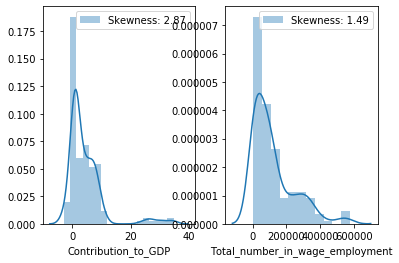

In [56]:
# creating subplots
fig, ax =plt.subplots(1,2)

# plotting distribution of "Contribution_to_GDP"
t = sns.distplot(df_cleaned["Contribution_to_GDP"],
               label="Skewness: %.2f"%(df_cleaned["Contribution_to_GDP"].skew()), ax=ax[0])
t.legend()

# plotting distribution of "Total_number_in_wage_employment"
s = sns.distplot(df_cleaned["Total_number_in_wage_employment"],
               label="Skewness: %.2f"%(df_cleaned["Total_number_in_wage_employment"].skew()), ax=ax[1])
s.legend()


In [57]:
df_cleaned.shape

(168, 3)

In [58]:
df_cleaned.head()

,Industry,Contribution_to_GDP,Total_number_in_wage_employment
0,"Agriculture, Forestry And Fishing",23.8,341422
1,Mining And Quarrying,0.7,8732
2,Manufacturing,9.6,276885
3,"Electricity, Gas, Steam And Air Conditioning S...",0.4,14018
4,"Water Supply; Sewerage, Waste Management And R...",0.7,21211


#### Exporting Cleaned DataFrame to Disk

In [59]:
# path
path = 'C:/Users/Isaac.Mwendwa/Documents/Productive_Employment_Prediction/Model Building/Datasets/'

#export
df_cleaned.to_csv(path +'Total Number in Wage Employment Model Dataset.csv', header=True, index=False)

#### Removing Skewness of Features Using a Log Transform

In [60]:
log_gdp_col = df_cleaned["Contribution_to_GDP"].map(lambda i: np.log(i) if i > 0 else 0)

log_wage_col = df_cleaned["Total_number_in_wage_employment"].map(lambda i: np.log(i) if i > 0 else 0)

#t=sns.distplot(log_gdp_col,label="Skewness: %.2f"%(log_gdp_col.skew()) )
#t.legend()

In [61]:
log_gdp_col.head()

0    3.169686
1   -0.356675
2    2.261763
3   -0.916291
4   -0.356675
Name: Contribution_to_GDP, dtype: float64

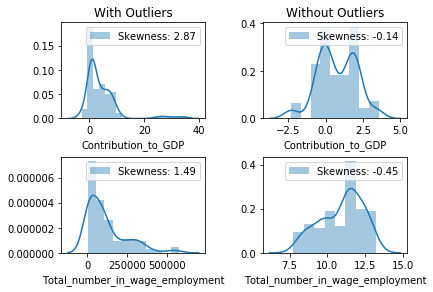

In [62]:
# creating subplots
fig, ax =plt.subplots(2,2)


# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)


# plotting distribution of "Contribution_to_GDP": With Outliers
a = sns.distplot(df_cleaned["Contribution_to_GDP"],
               label="Skewness: %.2f"%(df_cleaned["Contribution_to_GDP"].skew()), ax=ax[0, 0])
a.set_title('With Outliers')
a.legend()

# plotting distribution of "Contribution_to_GDP": Without Outliers
b = sns.distplot(log_gdp_col,
                 label="Skewness: %.2f"%(log_gdp_col.skew()), ax=ax[0, 1])
b.set_title('Without Outliers')
b.legend()

# plotting distribution of "Total_number_in_wage_employment": With Outliers
c = sns.distplot(df_cleaned["Total_number_in_wage_employment"],
               label="Skewness: %.2f"%(df_cleaned["Total_number_in_wage_employment"].skew()), ax=ax[1, 0])
c.legend()


# plotting distribution of "Total_number_in_wage_employment": Without Outliers
d = sns.distplot(log_wage_col,
                 label="Skewness: %.2f"%(log_wage_col.skew()), ax=ax[1, 1])
d.legend()

* The plots show that by using a log transform, we have been able to reduce skewness as follows:
    * Contribution_to_GDP from 2.87 to -0.14
    * Total_number_in_wage_employment from 1.49 to -0.45
* These skewness values exhibit approximate symmetry in the data distributions (-0.5 to 0.5), thus the log transform was successful in the operation

In [63]:
# Assigning log transformed columns back to df

df_cleaned['Contribution_to_GDP'] = log_gdp_col
df_cleaned['Total_number_in_wage_employment'] = log_wage_col

df_cleaned.head()

,Industry,Contribution_to_GDP,Total_number_in_wage_employment
0,"Agriculture, Forestry And Fishing",3.169686,12.740875
1,Mining And Quarrying,-0.356675,9.074750
2,Manufacturing,2.261763,12.531358
3,"Electricity, Gas, Steam And Air Conditioning S...",-0.916291,9.548097
4,"Water Supply; Sewerage, Waste Management And R...",-0.356675,9.962275


In [64]:
df_cleaned.shape

(168, 3)

In [65]:
# converting industry series to list
industry_cols = df_cleaned['Industry'].head(21).tolist()
industry_cols

['Agriculture, Forestry And Fishing',
 'Mining And Quarrying',
 'Manufacturing',
 'Electricity, Gas, Steam And Air Conditioning Supply',
 'Water Supply; Sewerage, Waste Management And Remediation Activities',
 'Construction',
 'Wholesale And Retail Trade; Repair Of Motor Vehicles And Motorcycles',
 'Transportation And Storage',
 'Accommodation And Food Service Activities',
 'Information And Communication',
 'Financial And Insurance Activities',
 'Real Estate Activities',
 'Professional, Scientific And Technical Activities',
 'Administrative And Support Service Activities',
 'Public Administration And Defence; Compulsory Social Security',
 'Education',
 'Human Health And Social Work Activities',
 'Arts, Entertainment And Recreation',
 'Other Service Activities',
 'Activities Of Households As Employers; Undifferentiated Goods- And Services-Producing Activities Of Households For Own Use',
 'Activities Of Extraterritorial Organizations And Bodies']

### Encoding of Features
* Datasets may contain object datatypes, but for building a model we need to have all features are in integer datatypes
* Encoding methods e.g. Label Encoder and OneHotEncoder are used to convert object datatype to integer datatype
* To determine which method we use, we will borrow from our EDA step of checking cardinality:

In [66]:
# Checking Cardinality of Categorical Features

for feature in cat_cols:
    print('The feature is: {} and number of categories are: {}'.format(feature, len(df_cleaned[feature].unique())))

The feature is: Industry and number of categories are: 21


* To avoid the curse of dimensionality, we will use binary encoding, as our categories are more than 10
* Binary encoding is an alternative method to one-hot encoding where we do not lose information about the variable, yet we obtain fewer features/dimensions after the encoding. 
* This is particularly useful when we have highly cardinal variables. For example, if a variable contains 128 unique categories, with one-hot encoding, we would need 127 features to encode the variable, whereas with binary encoding, we would only need 7 (log2(128)=7)
* 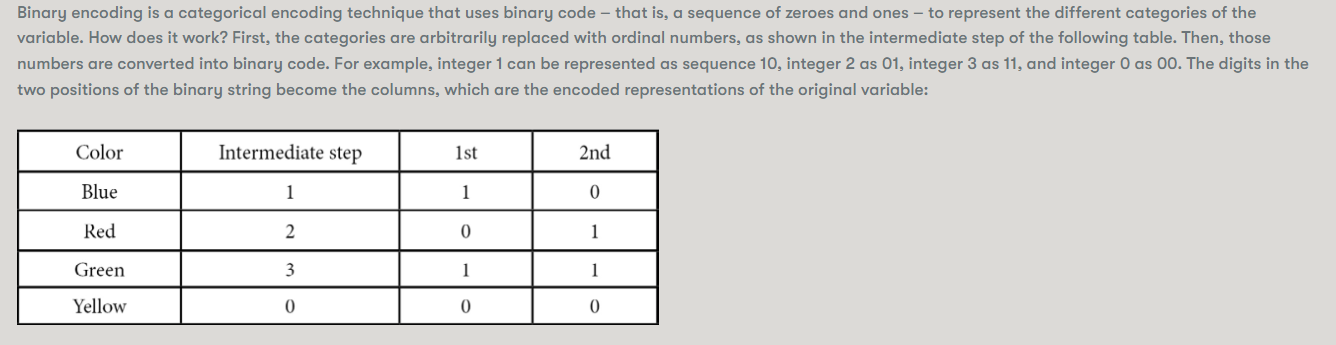

In [69]:
# Using Binary Encoding for Categorical Industry Column

# encode Industry column
encoder = BinaryEncoder(cols = ['Industry'], drop_invariant=True)

# create mapping from category to set of binary columns
encoder.fit(df_cleaned)

# encode the Industry variable in our dataframe
encoded_df = encoder.transform(df_cleaned)

encoded_df.columns

Index(['Industry_0', 'Industry_1', 'Industry_2', 'Industry_3', 'Industry_4',
       'Contribution_to_GDP', 'Total_number_in_wage_employment'],
      dtype='object')

In [70]:
encoded_df.head()

,Industry_0,Industry_1,Industry_2,Industry_3,Industry_4,Contribution_to_GDP,Total_number_in_wage_employment
0,0,0,0,0,1,3.169686,12.740875
1,0,0,0,1,0,-0.356675,9.074750
2,0,0,0,1,1,2.261763,12.531358
3,0,0,1,0,0,-0.916291,9.548097
4,0,0,1,0,1,-0.356675,9.962275


### Feature Scaling
* Feature Scaling helps to reduce the variance effect (features are not on same scale) and to overcome the fitting problem. 
* If features are not on the same scale, our model will give more weightage to the ones that have bigger values which is not the ideal scenario as the other columns are important for building the model
* There are two main types of scaling methods:
1. Standardization - is a technique to standardize the independent features that present in a fixed range to bring all values to the same magnitudes (standard normal distribution). In standardization, the mean of the independent features is 0 and the standard deviation is 1
    * Useful in algorithms that assume data is normally distributed, e.g., linear regression and logistic regression
2. Normalization - is a technique used to scale numerical data in the range of 0 to 1. This technique is useful when the distribution of the data is not known or when the data is not normally distributed
    * Useful in algorithms that are sensitive to the magnitude of values, e.g., neural networks, k-nearest neighbours
* However, in our scenario, we do not need feature scaling because we do not have different features that may bring different scales (only 1 numerical feature - Contribution_to_GDP) 

### --------------------------------------------------- End of Part 4( Exploratory Data Analysis) -----------------------------------


---



# Part 5: Modeling

* In this section, I develop ML models to give a predictive analysis of the working poor (Wage_bracket_0_to_9999)
* We will test 4 regressors, then pick the best performing regressor 
* We will then fine tune the hyperparameters of the best performing regressor, to get our final model

## Modeling: Predictive Analysis of the Total Number in Wage Employment (Total_number_in_wage_employment) 


### Defination of Problem

> I define the Supervised Learning Regression problem as **"Given the GDP indicators per Industry, predict the total number of people in wage employment: Total_number_in_wage_employment"**

### Loading Dataset

In [141]:
# load dataset
path = 'C:/Users/Isaac.Mwendwa/Documents/Productive_Employment_Prediction/Model Building/Datasets/'

final_df = pd.read_csv(path + 'Total Number in Wage Employment Model Dataset.csv', header=0, index_col=None)

dataset = final_df.copy()
print(dataset.columns)

Index(['Industry', 'Contribution_to_GDP', 'Total_number_in_wage_employment'], dtype='object')


In [142]:
dataset.shape

(168, 3)

In [143]:
dataset.head()

,Industry,Contribution_to_GDP,Total_number_in_wage_employment
0,"Agriculture, Forestry And Fishing",23.8,341422
1,Mining And Quarrying,0.7,8732
2,Manufacturing,9.6,276885
3,"Electricity, Gas, Steam And Air Conditioning S...",0.4,14018
4,"Water Supply; Sewerage, Waste Management And R...",0.7,21211


In [144]:
dataset.describe()

,Contribution_to_GDP,Total_number_in_wage_employment
count,168.000000,168.000000
mean,4.403012,118658.666667
std,6.463415,126191.119148
min,-2.800000,2328.000000
25%,0.800000,19352.500000
50%,1.700000,77797.500000
75%,6.725000,165884.000000
max,34.800000,576831.000000


In [75]:
# Removing Skewness/Outliers using a Log Transform

dataset["Contribution_to_GDP"] = dataset["Contribution_to_GDP"].map(lambda i: np.log(i) if i > 0 else 0)

dataset["Total_number_in_wage_employment"] = dataset["Total_number_in_wage_employment"].map(lambda i: np.log(i) if i > 0 else 0)

dataset.head()

,Industry,Contribution_to_GDP,Total_number_in_wage_employment
0,"Agriculture, Forestry And Fishing",3.169686,12.740875
1,Mining And Quarrying,-0.356675,9.074750
2,Manufacturing,2.261763,12.531358
3,"Electricity, Gas, Steam And Air Conditioning S...",-0.916291,9.548097
4,"Water Supply; Sewerage, Waste Management And R...",-0.356675,9.962275


In [78]:
# Checking if log transform reversed gives original data
log_transform_reversed = np.exp(dataset["Contribution_to_GDP"])

log_transform_reversed.head()

0    23.8
1     0.7
2     9.6
3     0.4
4     0.7
Name: Contribution_to_GDP, dtype: float64

### Split data into train and test sets

In [79]:
# Setting training data to be the first 7 years of data
n_train_years = 7*21

# split into train and test sets
train_set = dataset[:n_train_years]
test_set = dataset[n_train_years:]

In [80]:
train_set.shape

(147, 3)

In [81]:
test_set.shape

(21, 3)

### Segregating Target and Feature Variables

In [82]:
data_train = train_set.drop("Total_number_in_wage_employment", axis=1)
data_train_labels = train_set["Total_number_in_wage_employment"].copy()
data_train.shape

(147, 2)

In [83]:
data_train.head()

,Industry,Contribution_to_GDP
0,"Agriculture, Forestry And Fishing",3.169686
1,Mining And Quarrying,-0.356675
2,Manufacturing,2.261763
3,"Electricity, Gas, Steam And Air Conditioning S...",-0.916291
4,"Water Supply; Sewerage, Waste Management And R...",-0.356675


In [84]:
data_train_labels.shape

(147,)

In [85]:
data_train_labels.head()

0    12.740875
1     9.074750
2    12.531358
3     9.548097
4     9.962275
Name: Total_number_in_wage_employment, dtype: float64

### Pipelines for Transforming Data

In [86]:
# Checking dtypes of data columns
data_train.dtypes

Industry                object
Contribution_to_GDP    float64
dtype: object

#### Full Pipeline Transformer for Numerical and Categorical Data

In [87]:
def pipeline_transformer(data):
    '''
    Complete transformation pipeline for both
    categorical data (Binary Encoding) and 
    numerical data (Passthrough - no transformation)
    
    Argument:
        data: original dataframe 
    Returns:
        data: transformed data, ready to use
    '''
    cat_attrs = ["Industry"]
    
    full_pipeline = ColumnTransformer([
        # transform the categorical data and pass through the numerical columns unchanged
        ("cat", BinaryEncoder(), cat_attrs)], remainder = 'passthrough')    #
    
    data = full_pipeline.fit_transform(data)
    
    return data

#### Calling Pipelines for Transforming Data

In [88]:
# Preparing data using pipeline_transformer()
prepared_data_train = pipeline_transformer(data_train)

prepared_data_train

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         3.16968558],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        -0.35667494],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         2.2617631 ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        -0.91629073],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        -0.35667494],
       [ 0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         1.41098697],
       [ 0.        ,  0.        ,  1.        ,  1.        ,  1.        ,
         2.35137526],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         2.05412373],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.53062825],
       [ 0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.78845736],
       [ 0.        ,  1.        ,  0.        ,  1.

In [89]:
# shape of train data
prepared_data_train.shape

(147, 6)

#### Preparing Test Data

In [158]:
# Preparing Test Data
X_test = test_set.drop("Total_number_in_wage_employment", axis=1)
y_test = test_set["Total_number_in_wage_employment"].copy()

# Preparing data using pipeline_transformer()
prepared_X_test = pipeline_transformer(X_test)



## Training ML Models

I will train the following models:
1. Linear Regression
2. Decision Tree Regressor
3. Random Forest Regressor
4. SVM Regressor

### 1. Linear Regression

In [90]:
# Fitting Model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(prepared_data_train, data_train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
##testing the predictions with first year of data (21 rows)
sample_data = data_train.iloc[:21]
sample_labels = data_train_labels.iloc[:21]
sample_data.shape

(21, 2)

In [92]:
# Prepare test data
sample_data_prepared = pipeline_transformer(sample_data)

sample_data_prepared.shape

(21, 6)

#### Linear Regression Model Evaluation 

In [110]:
# Function for getting RMSE in Log Transform Values
def get_rmse_log_transformed (model, sample_data_prepared, sample_labels, model_name):
    
    log_predictions = model.predict(sample_data_prepared)
    print("Prediction of samples: ", log_predictions)
    
    print("Actual Labels of samples: ", list(sample_labels))
    
    mse = mean_squared_error(sample_labels, log_predictions)
    rmse = np.sqrt(mse)
    
    print("RMSE in Log Transform Values of: " + model_name + " is: " + str(rmse))

In [113]:
# function for reversing log transform to get actual values
def get_actual_predictions(model, sample_data_prepared, sample_labels, model_name):
    
    # Reversing log transform applied to get actual predictions
    actual_predictions = np.exp(model.predict(sample_data_prepared))
    print("Prediction of samples: ", actual_predictions)

    # Reversing log transform applied to get actual test labels
    actual_sample_labels  = np.exp(list(sample_labels))
    print("Actual Labels of samples: ", actual_sample_labels)

    # Getting Actual RMSE (Log Transform Reversed)
    actual_mse = mean_squared_error(actual_sample_labels, actual_predictions)
    actual_rmse = np.sqrt(actual_mse)
    print("Actual RMSE (Log Transform Reversed) of: " + model_name + " is: " + str(actual_rmse))
    
    return actual_predictions, actual_sample_labels


In [119]:
# Getting Predictions and RMSE in Log Transform Values
get_rmse_log_transformed(lin_reg, sample_data_prepared, sample_labels, "Linear Regression Model")

Prediction of samples:  [12.90734001 10.349667   12.40868033  9.47469991 10.46415673 10.65672413
 11.84399196 11.18664803 11.09393021 10.50214069 11.74743864 10.27798295
 10.5924633   9.91399152 11.01613447 11.70391275 11.94424914 11.3679682
 10.98643686 10.94951303 11.64824989]
Actual Labels of samples:  [12.740874527805232, 9.074749717669835, 12.53135753651081, 9.54809749706027, 9.962275194019217, 11.598414850985643, 12.047551596202045, 11.244496849440335, 11.167741390246988, 11.267434049992112, 10.887343470572707, 8.184513753033722, 10.999479745081548, 7.752764808851328, 12.052455156864575, 12.859543008937221, 11.544395061839623, 8.416267272826277, 10.880101684393388, 11.621564600076658, 9.570110520822217]
RMSE in Log Transform Values of: Linear Regression Model is: 1.184634981480246


In [120]:
# Getting Predictions and RMSE in Actual Values (Log Transformed Inversed)
rmse_actual = get_actual_predictions(lin_reg, sample_data_prepared, sample_labels, "Linear Regression Model")

Prediction of samples:  [403261.29583561  31246.63602432 244918.3895601   13025.96446368
  35036.88807743  42477.25920429 139245.23796391  72160.49588407
  65770.73183227  36393.32599634 126429.31335739  29085.1481613
  39833.49031612  20211.18665276  60848.01486814 121044.40562065
 153929.37033309  86505.92641747  59067.54268167  56926.31709549
 114490.81666621]
Actual Labels of samples:  [341422.   8732. 276885.  14018.  21211. 108925. 170681.  76458.  70809.
  78232.  53495.   3585.  59843.   2328. 171520. 384440. 103197.   4520.
  53109. 111476.  14330.]
Actual RMSE (Log Transform Reversed) of: Linear Regression Model is: 76655.40154972332


### 2. Decision Tree Regressor

In [121]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(prepared_data_train, data_train_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [122]:
# Getting Predictions and RMSE in Log Transform Values
get_rmse_log_transformed(tree_reg, sample_data_prepared, sample_labels, "Decision Tree Regressor Model")

Prediction of samples:  [12.74087453  9.07474972 12.53135754  9.5480975  10.13287097 11.59841485
 12.0475516  11.24449685 11.16774139 11.26743405 10.88734347  8.18451375
 10.99947975  7.75276481 12.05245516 12.85954301 11.54439506  8.41626727
 10.69081436 11.6215646   9.57011052]
Actual Labels of samples:  [12.740874527805232, 9.074749717669835, 12.53135753651081, 9.54809749706027, 9.962275194019217, 11.598414850985643, 12.047551596202045, 11.244496849440335, 11.167741390246988, 11.267434049992112, 10.887343470572707, 8.184513753033722, 10.999479745081548, 7.752764808851328, 12.052455156864575, 12.859543008937221, 11.544395061839623, 8.416267272826277, 10.880101684393388, 11.621564600076658, 9.570110520822217]
RMSE in Log Transform Values of: Decision Tree Regressor Model is: 0.0556060163184952


In [124]:
# Getting Predictions and RMSE in Actual Values (Log Transformed Inversed)
rmse_actual = get_actual_predictions(tree_reg, sample_data_prepared, sample_labels, "Decision Tree Regressor Model")

Prediction of samples:  [341422.           8732.         276885.          14018.
  25156.48433547 108925.         170681.          76458.
  70809.          78232.          53495.           3585.
  59843.           2328.         171520.         384440.
 103197.           4520.          43950.28371922 111476.
  14330.        ]
Actual Labels of samples:  [341422.   8732. 276885.  14018.  21211. 108925. 170681.  76458.  70809.
  78232.  53495.   3585.  59843.   2328. 171520. 384440. 103197.   4520.
  53109. 111476.  14330.]
Actual RMSE (Log Transform Reversed) of: Decision Tree Regressor Model is: 2176.1579353710713


**The Decison Tree Regressor above has a very low RMSE as compared to range of data and other model's RMSE, which means that it overfitted the data greatly, as no model is perfect (Decision Trees are prone to overfitting).**

#### Model Evaluation of the Decision Tree and Linear Regressors using Cross Validation

Scikit-Learn’s K-fold cross-validation feature randomly splits the training set into `K` distinct subsets called folds, then it trains and evaluates the model `K` times, picking a different fold for evaluation every time and training on the other `K-1` folds.

The result is an array containing the `K` evaluation scores:

In [125]:
# Cross Validation in Linear Regression

scores = cross_val_score(lin_reg, 
                         prepared_data_train, 
                         data_train_labels, 
                         scoring="neg_mean_squared_error", 
                         cv = 10) # k is chosen as 10/5 ,as these values lead to low bias and variance

lin_reg_rmse_scores = np.sqrt(-scores)
lin_reg_rmse_scores

array([1.00545265, 1.15499786, 1.15924249, 1.00321407, 1.04209771,
       0.99480584, 1.15905936, 0.94441099, 1.02376336, 1.4713039 ])

In [126]:
lin_reg_rmse_scores.mean()

1.0958348234212256

In [127]:
# Cross Validation in Decision Tree

scores = cross_val_score(tree_reg,
                         prepared_data_train,
                         data_train_labels,
                         scoring='neg_mean_squared_error',
                         cv=10) 
tree_reg_rmse_scores = np.sqrt(-scores)
tree_reg_rmse_scores

array([0.84728294, 1.45351508, 0.21523306, 0.07335842, 0.5138756 ,
       0.19823684, 0.06565681, 0.04110152, 0.0863205 , 1.44915796])

In [128]:
tree_reg_rmse_scores.mean()

0.49437387233220764

### 3. Random Forest Regressor

In [129]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(prepared_data_train, data_train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [130]:
# Getting Predictions and RMSE in Log Transform Values
get_rmse_log_transformed(forest_reg, sample_data_prepared, sample_labels, "Random Forest Regressor Model")

Prediction of samples:  [12.74396457  9.37431075 12.5479508  10.07626346 10.14108394 11.63528202
 11.87450389 10.9814044  11.15237165 10.96889035 10.94454406  8.64728915
 10.86301511  8.23614245 12.11409677 12.86382229 11.25412797  8.7958176
 10.71289788 11.46140159 10.53186656]
Actual Labels of samples:  [12.740874527805232, 9.074749717669835, 12.53135753651081, 9.54809749706027, 9.962275194019217, 11.598414850985643, 12.047551596202045, 11.244496849440335, 11.167741390246988, 11.267434049992112, 10.887343470572707, 8.184513753033722, 10.999479745081548, 7.752764808851328, 12.052455156864575, 12.859543008937221, 11.544395061839623, 8.416267272826277, 10.880101684393388, 11.621564600076658, 9.570110520822217]
RMSE in Log Transform Values of: Random Forest Regressor Model is: 0.32887002655943365


In [132]:
# Getting Predictions and RMSE in Actual Values (Log Transformed Inversed)
rmse_actual = get_actual_predictions(forest_reg, sample_data_prepared, sample_labels, "Random Forest Regressor Model")

Prediction of samples:  [342478.63951045  11781.79409307 281517.75656921  23771.99449003
  25363.94468992 113015.69957506 143559.36090576  58771.03460618
  69729.00468595  58040.15355981  56644.15353661   5694.68833247
  52209.257823     3774.95014178 182425.43099325 386088.65241907
  77197.93339653   6606.5548638   44931.65695332  94978.09701252
  37491.38893646]
Actual Labels of samples:  [341422.   8732. 276885.  14018.  21211. 108925. 170681.  76458.  70809.
  78232.  53495.   3585.  59843.   2328. 171520. 384440. 103197.   4520.
  53109. 111476.  14330.]
Actual RMSE (Log Transform Reversed) of: Random Forest Regressor Model is: 12668.817027698684


### 4. Support Vector Machine Regressor

In [133]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
svm_reg.fit(prepared_data_train, data_train_labels)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [134]:
# Getting Predictions and RMSE in Log Transform Values
get_rmse_log_transformed(svm_reg, sample_data_prepared, sample_labels, "Support Vector Machine Regressor Model")

Prediction of samples:  [12.74646363  9.8157738  12.36995333  9.11386561 10.26688043 10.93912301
 12.35127869 11.33182468 11.0671445  10.711846   12.20002364 10.86252586
 11.13129268 10.66243672 11.96307518 11.65166947 11.82330454 11.48832294
 10.84528471 11.38446486 12.15662412]
Actual Labels of samples:  [12.740874527805232, 9.074749717669835, 12.53135753651081, 9.54809749706027, 9.962275194019217, 11.598414850985643, 12.047551596202045, 11.244496849440335, 11.167741390246988, 11.267434049992112, 10.887343470572707, 8.184513753033722, 10.999479745081548, 7.752764808851328, 12.052455156864575, 12.859543008937221, 11.544395061839623, 8.416267272826277, 10.880101684393388, 11.621564600076658, 9.570110520822217]
RMSE in Log Transform Values of: Support Vector Machine Regressor Model is: 1.324100216382354


In [136]:
# Getting Predictions and RMSE in Actual Values (Log Transformed Inversed)
rmse_actual = get_actual_predictions(svm_reg, sample_data_prepared, sample_labels, "Support Vector Machine Regressor Model")

Prediction of samples:  [343335.58656357  18320.46101466 235614.74962609   9080.32813042
  28764.01566643  56337.91341955 231255.55858401  83435.12606471
  64032.40121541  44884.41891955 198793.84975577  52183.72051266
  68274.5718358   42720.60855039 156854.70070714 114882.99645538
 136394.20461397  97569.76543824  51291.72486177  87944.82061135
 190350.83013983]
Actual Labels of samples:  [341422.   8732. 276885.  14018.  21211. 108925. 170681.  76458.  70809.
  78232.  53495.   3585.  59843.   2328. 171520. 384440. 103197.   4520.
  53109. 111476.  14330.]
Actual RMSE (Log Transform Reversed) of: Support Vector Machine Regressor Model is: 84197.77305194428


#### Model Evaluation of the Random Forest and SVM Models using Cross Validation

In [137]:
# Cross Validation in Random Forest

forest_reg_cv_scores = cross_val_score(forest_reg,
                                         prepared_data_train,
                                         data_train_labels,
                                         scoring='neg_mean_squared_error',
                                         cv = 10)

forest_reg_rmse_scores = np.sqrt(-forest_reg_cv_scores)
forest_reg_rmse_scores.mean()

0.5146084197529339

In [138]:
svm_cv_scores = cross_val_score(svm_reg, 
                                prepared_data_train, 
                                data_train_labels,
                                scoring='neg_mean_squared_error',
                                cv = 10)

svm_rmse_scores = np.sqrt(-svm_cv_scores)
svm_rmse_scores.mean()

1.1588174188231692

### Comparing Trained Models Metrics

In [148]:
# 1. RMSE Actual Values in 1 Year Training Data
rmse_df = pd.DataFrame({
    "ML Model": ['Linear Regression', 'Decision Trees', 'Random Forest', 'Support Vector Machines'],
    "RMSE in 1 Train Year Data (Actual Values)": [76655, 2176, 12668, 84197],
})

rmse_df

,ML Model,RMSE in 1 Train Year Data (Actual Values)
0,Linear Regression,76655
1,Decision Trees,2176
2,Random Forest,12668
3,Support Vector Machines,84197


In [149]:
# RMSE in Cross Validation (Log Transformed)
rmse_cv_df = pd.DataFrame({
    "ML Model": ['Linear Regression', 'Decision Trees', 'Random Forest', 'Support Vector Machines'],
    "RMSE in Cross Validation (Log Transformed)": [1.09, 0.49, 0.51, 1.15],
})
rmse_cv_df

,ML Model,RMSE in Cross Validation (Log Transformed)
0,Linear Regression,1.09
1,Decision Trees,0.49
2,Random Forest,0.51
3,Support Vector Machines,1.15


* After comparing the four models, I found out that the **RandomForestRegressor had the least valid RMSE (12668)
* The Decision Tree Regressor has a very low RMSE as compared to range of data and other model's RMSE, which means that it overfitted the data greatly, as no model is perfect (Decision Trees are prone to overfitting)
* **The Random Forest's model hyperparameters still need to be fine-tuned**

### Hyperparameter Tuning of Random Forest Model using Random Search CV and Grid Search CV

#### Checking Random Forest Model's Default Hyperparameters

In [150]:
forest_reg = RandomForestRegressor()
forest_reg.fit(prepared_data_train, data_train_labels)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(forest_reg.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


* The hyperparameters we will adjust include:
    * n_estimators = number of trees in the forest
    * max_features = max number of features considered for splitting a node
    * max_depth = max number of levels in each decision tree
    * min_samples_split = min number of data points placed in a node before the node is split
    * min_samples_leaf = min number of data points allowed in a leaf node
    * bootstrap = method for sampling data points (with or without replacement)

### Random Search Cross Validation in Scikit-Learn
* Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges
* We then randomly sample from the grid, performing K-Fold CV with each combination of values

In [151]:
# Creating a parameter grid to sample from during fitting

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


* On each iteration, the algorithm will choose a difference combination of the features. Altogether, there are 2 * 12 * 2 * 3 * 3 * 10 = 4320 settings
* However, the benefit of a random search is that we are not trying every combination, but selecting at random to sample a wide range of values

In [152]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(prepared_data_train, data_train_labels)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  6.7min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [153]:
# Viewing the best parameters from fitting the random search
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [154]:
# implementation of NRMSE with standard deviation
def normalized_root_mean_squared_error(true, pred):
    squared_error = np.square((true - pred))
    sum_squared_error = np.sum(squared_error)
    rmse = np.sqrt(sum_squared_error / true.size)
    nrmse_loss = rmse/np.std(pred)
    print("NRMSE of model: " + str(nrmse_loss))

In [159]:
# Checking metrics of base model (forest_reg)

forest_reg = RandomForestRegressor()
forest_reg.fit(prepared_data_train, data_train_labels)

pred, true = get_actual_predictions(forest_reg, prepared_X_test, y_test, "Final Random Forest Regressor Model")

base_model_nrmse = normalized_root_mean_squared_error(true, pred)

Prediction of samples:  [336796.01078267  18796.82324383 290204.16288808  20445.9998314
  24670.63436145 167074.74657112 242728.01362915  76643.06117297
  78300.42562698  86482.82726292  65413.86406679   8867.82191005
  71631.07311029   5328.56890496  16298.00210187 436854.76518613
 135430.43530443   8464.7896612   33015.98382679 118410.21137679
  15124.21804443]
Actual Labels of samples:  [336607.  19550. 307591.  20792.  28340. 173245. 260427.  90649.  81553.
 123290.  79798.   4335.  76608.   6066. 295009. 576831. 150434.   8922.
  38012. 121703. 118655.]
Actual RMSE (Log Transform Reversed) of: Final Random Forest Regressor Model is: 72616.08122084846
NRMSE of model: 0.6104534007756396


In [160]:
# Checking Performance of Best Estimator from RandomSearch
best_random = rf_random.best_estimator_

pred, true = get_actual_predictions(best_random, prepared_X_test, y_test, "Best Random Search Estimator for Random Forest Model")

#best_rs_acc = evaluate(best_random, prepared_X_test, y_test)

best_rs_nmrse = normalized_root_mean_squared_error(true, pred)

Prediction of samples:  [333570.07143683  18209.63290822 243627.16952416  20627.20421856
  25315.17212722 166426.22459766 242053.668829    74954.14516307
  76585.70847389  95009.27229009  64344.91350799   4994.92941578
  53766.74583223   5921.81025204 105605.51167114 438603.53400466
 131969.65431478   8454.39353789  32629.20501053  88269.85861077
  14522.69406153]
Actual Labels of samples:  [336607.  19550. 307591.  20792.  28340. 173245. 260427.  90649.  81553.
 123290.  79798.   4335.  76608.   6066. 295009. 576831. 150434.   8922.
  38012. 121703. 118655.]
Actual RMSE (Log Transform Reversed) of: Best Random Search Estimator for Random Forest Model is: 59216.86253561283
NRMSE of model: 0.5166383767057033


In [161]:
# Viewing the best parameters from fitting the random search
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [213]:
# Grid Search CV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [100, 110, 120],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [950, 1000, 1050]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2, return_train_score=True)

In [214]:
# Fit the grid search to the data
grid_search.fit(prepared_data_train, data_train_labels);

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:   58.4s finished


In [215]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1050}

In [216]:
# Checking Performance of Best Grid from GridSearch
best_grid = grid_search.best_estimator_

pred, true = get_actual_predictions(best_grid, prepared_X_test, y_test, "Best Grid Search Estimator for Random Forest Model")

best_gs_nmrse = normalized_root_mean_squared_error(true, pred)

Prediction of samples:  [332104.99999991  18528.38487582 293737.48723074  20615.
  25156.48433548 170119.2068375  250758.00000004  75740.51130672
  78561.71317505 117133.          65849.           4379.44555945
  45984.03258957   5583.02840131  55955.95152869 524605.99999995
 133414.35320902   8457.92133311  32572.44997727  82268.02069614
  14453.0196359 ]
Actual Labels of samples:  [336607.  19550. 307591.  20792.  28340. 173245. 260427.  90649.  81553.
 123290.  79798.   4335.  76608.   6066. 295009. 576831. 150434.   8922.
  38012. 121703. 118655.]
Actual RMSE (Log Transform Reversed) of: Best Grid Search Estimator for Random Forest Model is: 59495.845322966496
NRMSE of model: 0.4532364965538807


### Cross Validation Evaluation Results for Base Model, Random Best Model and Grid Search Best Model

In [217]:
# RMSE in Cross Validation Results for Base Model, Random Search Best Model and Grid Search Best Model
rmse_cv_df = pd.DataFrame({
    "Hyperparameters and Metrics(RMSE, NRMSE)": ['n_estimators','max_features', 'max_depth', 
                                                 'min_samples_split', 'min_samples_leaf', 'bootstrap', 
                                                 'Evaluation Metric: RMSE', 'Evaluation Metric: NRMSE'],
    
    "Base Model": [10, 'auto', None, 2, 1, True, 72616, 0.61],
    
    "Best Random Search Model": [1000, 'sqrt', 110, 2, 1, True, 59216, 0.51],
    
    "Best Grid Search Model": [1600, 'sqrt', 8, 5, 2, False, 59495, 0.45]
})

rmse_cv_df

,"Hyperparameters and Metrics(RMSE, NRMSE)",Base Model,Best Random Search Model,Best Grid Search Model
0,n_estimators,10,1000,1600
1,max_features,auto,sqrt,sqrt
2,max_depth,None,110,8
3,min_samples_split,2,2,5
4,min_samples_leaf,1,1,2
5,bootstrap,True,True,False
6,Evaluation Metric: RMSE,72616,59216,59495
7,Evaluation Metric: NRMSE,0.61,0.51,0.45


* The results show that **there is an improvement due to hyperparameter tuning in the evaluation metrics (decrease in error metrics - RMSE and NRMSE), from the Base Model, to the Best Random Search Model, and finally to the Best Grid Search Model**
* We will thus **adopt the Best Grid Search Model as our final tuned model, which has the lowest error metrics (NRMSE = 0.45)**

### Evaluating entire system on test data

In [218]:
test_set.shape

(21, 3)

In [219]:
# getting final model after hyperparameter tuning
final_model = grid_search.best_estimator_

X_test = test_set.drop("Total_number_in_wage_employment", axis=1)
y_test = test_set["Total_number_in_wage_employment"].copy()

# Preparing data using pipeline_transformer()
prepared_X_test = pipeline_transformer(X_test)

final_predictions = final_model.predict(prepared_X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.607943122160144

In [220]:
# Getting Predictions and RMSE in Log Transform Values
get_rmse_log_transformed(final_model, prepared_X_test, y_test, "Final Random Forest Regressor Model")

Prediction of samples:  [12.71320646  9.82705915 12.59044175  9.93377425 10.13287097 12.04425469
 12.43224361 11.23506845 11.27163975 11.67106532 11.09511952  8.38467741
 10.7360495   8.62748663 10.93232008 13.17040278 11.801215    9.04285872
 10.39122212 11.31773774  9.57865864]
Actual Labels of samples:  [12.726671356719871, 9.880730565413511, 12.636526257407946, 9.942323576321327, 10.252029513244672, 12.062462056606831, 12.470077870577407, 11.414750184682548, 11.309008394619614, 11.722294582862599, 11.287253720467184, 8.374476889214643, 11.246456788917644, 8.710454688248527, 12.594761143331159, 13.265304608307567, 11.921279728779087, 9.09627541568821, 10.545657178331206, 11.709338929452402, 11.68397540172612]
RMSE in Log Transform Values of: Final Random Forest Regressor Model is: 0.607943122160144


In [255]:
# Getting Predictions and RMSE in Actual Values (Log Transformed Inversed)
final_rmse = get_actual_predictions(final_model, prepared_X_test, y_test, "Final Random Forest Regressor Model")

Prediction of samples:  [332104.99999991  18528.38487582 293737.48723074  20615.
  25156.48433548 170119.2068375  250758.00000004  75740.51130672
  78561.71317505 117133.          65849.           4379.44555945
  45984.03258957   5583.02840131  55955.95152869 524605.99999995
 133414.35320902   8457.92133311  32572.44997727  82268.02069614
  14453.0196359 ]
Actual Labels of samples:  [336607.  19550. 307591.  20792.  28340. 173245. 260427.  90649.  81553.
 123290.  79798.   4335.  76608.   6066. 295009. 576831. 150434.   8922.
  38012. 121703. 118655.]
Actual RMSE (Log Transform Reversed) of: Final Random Forest Regressor Model is: 59495.845322966496


### Saving the model

In [233]:
# Defining model path
path_model = 'C:/Users/Isaac.Mwendwa/Documents/Productive_Employment_Prediction/Model Building/'

# path to model
total_employment_model_path = path_model + "total_number_in_employment.bin"

In [256]:
##saving the model
with open(total_employment_model_path, 'wb') as f_out:
    pickle.dump(final_model, f_out)
    f_out.close()

### Creating prediction function

In [263]:
# function to get predictions from input dataframe
def get_predictions(input_df, model):
    
    #Removing skewness from data
    input_df['Contribution_to_GDP'] = input_df["Contribution_to_GDP"].map(
                                        lambda i: np.log(i) if i > 0 else 0)
    
    # Preparing data using pipeline_transformer()
    prepared_df = pipeline_transformer(input_df)
    
    # Getting Predictions from Model
    pred_results = model.predict(prepared_df)
    
    # Reversing log transform to get actual results
    pred_results = np.exp(pred_results)
    
    # Creating list of predictions
    pred_list = pred_results.tolist()
    pred_list.sort(reverse = True)
    
    
    # Create Dictionary of Industry and Predicted Values
    pred_dict = {industry_cols[i]: pred_list[i] for i in range(len(industry_cols))}
    
    return pred_dict


In [258]:
# getting test dataset predictors only 
df_test = test_set.drop("Total_number_in_wage_employment", axis=1)

In [259]:
df_test.shape

(21, 2)

In [260]:
df_test.head()

,Industry,Contribution_to_GDP
147,"Agriculture, Forestry And Fishing",3.532226
148,Mining And Quarrying,-0.223144
149,Manufacturing,2.041220
150,"Electricity, Gas, Steam And Air Conditioning S...",0.587787
151,"Water Supply; Sewerage, Waste Management And R...",-0.356675


In [261]:
##loading the model from the saved file

with open(total_employment_model_path, 'rb') as f_in:
    model = pickle.load(f_in)

### Getting predictions from model: Total Number in Wage Employment per Industry

In [264]:
input_df = df_test

# calling prediction function
pred_dict = get_predictions(input_df, model)

# Displaying prediction dictionary
pred_dict

{'Agriculture, Forestry And Fishing': 149900.60515709702,
 'Mining And Quarrying': 121231.0000000158,
 'Manufacturing': 75558.58661870318,
 'Electricity, Gas, Steam And Air Conditioning Supply': 74026.11386925737,
 'Water Supply; Sewerage, Waste Management And Remediation Activities': 71774.51795800467,
 'Construction': 64890.768303130964,
 'Wholesale And Retail Trade; Repair Of Motor Vehicles And Motorcycles': 56910.38925640615,
 'Transportation And Storage': 40766.735651051575,
 'Accommodation And Food Service Activities': 38453.40351671154,
 'Information And Communication': 35541.55516176553,
 'Financial And Insurance Activities': 34136.64561024128,
 'Real Estate Activities': 31319.132595534582,
 'Professional, Scientific And Technical Activities': 26257.98502074831,
 'Administrative And Support Service Activities': 22180.018914657398,
 'Public Administration And Defence; Compulsory Social Security': 16960.000000001182,
 'Education': 14453.019635897515,
 'Human Health And Social Wor

In [ ]:
########################################################################################

In [272]:
train_data.head()

NameError: name 'train_data' is not defined

In [276]:
import pandas as pd
import numpy as np

#from sklearn.datasets import fetch_california_housing

from evidently import ColumnMapping

#from evidently.report import Report
from evidently.metrics.base_metric import generate_column_metrics
from evidently.metric_preset import DataDriftPreset, TargetDriftPreset
from evidently.metrics import *

from evidently.test_suite import TestSuite
from evidently.tests.base_test import generate_column_tests
from evidently.test_preset import DataStabilityTestPreset, NoTargetPerformanceTestPreset
from evidently.tests import *

ImportError: cannot import name 'mean_absolute_percentage_error'

In [ ]:
# load dataset
path = 'C:/Users/Isaac.Mwendwa/Documents/Productive_Employment_Prediction/Model Building/Datasets/'

final_df = pd.read_csv(path + 'Total Number in Wage Employment Model Dataset.csv', header=0, index_col=None)

dataset = final_df.copy()
print(dataset.columns)



In [ ]:
# Setting training data to be the first 7 years of data
n_train_years = 7*21

# split into train and test sets
train_set = dataset[:n_train_years]
test_set = dataset[n_train_years:]

In [275]:
from sklearn.metrics import mean_absolute_percentage_error

ImportError: cannot import name 'mean_absolute_percentage_error'

# Part 7: Model Deployment

---



In [ ]:
!pip install flask

In [ ]:
!pip install flask-wtf

In [ ]:
!pip install gunicorn

In [ ]:
!pip freeze > requirements.txt